In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.plot import *

## Load Cell Tidy Data

In [2]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

for sub_type in cell_tidy_data['SubType'].unique():
    if sub_type not in sub_type_palette:
        # outlier and NA color
        sub_type_palette[sub_type] = '#D3D3D3'

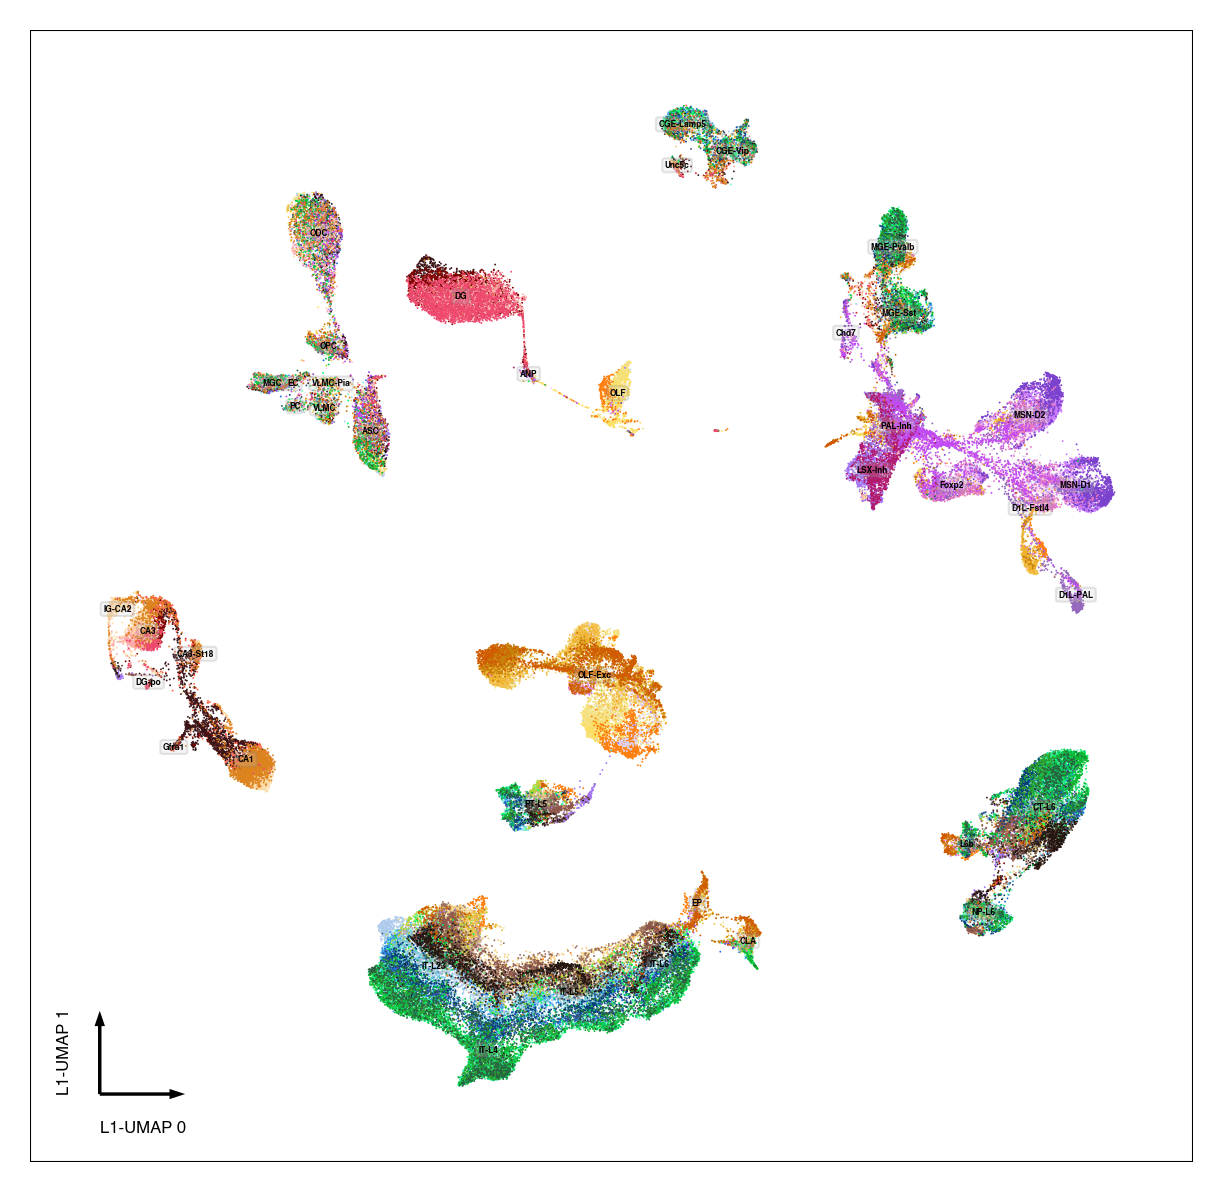

In [4]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

categorical_scatter(ax=ax,
                    data=cell_tidy_data,
                    coord_base='l1-umap',
                    hue='Region',
                    palette=region_palette,
                    s=0.2,
                    max_points=None,
                    text_anno='MajorType', 
                    text_anno_kws=dict(fontsize=2))

add_ax_box(ax, linewidth=0.5)
pass

## Select Cluster and Region

In [32]:
use_major_type = ['IT-L23', 'IT-L4', 'IT-L5', 'IT-L6']
dissection_regions = [
    'ORB', 
    'PFC-1', 'PFC-2', 
    'ACA-1', 'ACA-2', 'ACA-3', 
    'MOs-1', 'MOs-2', 'MOs-3', 
    'MOp-1', 'MOp-2', 'MOp-3', 'MOp-4', 
    'AI', 
    'SSp-1', 'SSp-2', 'SSp-3', 'SSp-4', 'SSp-5', 
    'SSs-1', 'SSs-2'
]

In [33]:
use_cells = cell_tidy_data[(cell_tidy_data['MajorType'].isin(use_major_type)) & 
                           (cell_tidy_data['RegionName'].isin(dissection_regions))]

In [34]:
# approximately 1000 cells if each cell is 1.5M reads
max_reads = 1500000 * 500

records = []
for _, sub_df in use_cells.groupby(['RegionName', 'MajorType']):
    select_n = int(max_reads / sub_df['FinalReads'].mean())
    if select_n < sub_df.shape[0]:
        sub_df = sub_df.sample(select_n, random_state=0)
    records.append(sub_df)
use_cells = pd.concat(records)

## Filterout combination < 100 cells

In [35]:
use_cells['ITSpatial'] = use_cells['MajorType'] + '+' + use_cells['RegionName']

In [41]:
pass_100cells = use_cells['ITSpatial'].value_counts() > 100
use_combination = pass_100cells[pass_100cells].index
use_combination

Index(['IT-L23+ORB', 'IT-L23+PFC-1', 'IT-L23+ACA-1', 'IT-L23+ACA-3',
       'IT-L4+SSp-5', 'IT-L4+SSp-3', 'IT-L23+PFC-2', 'IT-L4+SSp-2',
       'IT-L23+MOs-3', 'IT-L5+ACA-3', 'IT-L5+MOs-1', 'IT-L23+MOs-1',
       'IT-L23+SSp-5', 'IT-L23+SSp-3', 'IT-L23+ACA-2', 'IT-L23+AI',
       'IT-L23+MOp-3', 'IT-L5+ORB', 'IT-L23+MOs-2', 'IT-L23+MOp-1',
       'IT-L5+PFC-1', 'IT-L5+MOs-2', 'IT-L23+MOp-2', 'IT-L23+SSp-1',
       'IT-L4+SSp-4', 'IT-L5+PFC-2', 'IT-L5+MOp-3', 'IT-L4+SSs-2',
       'IT-L23+SSs-2', 'IT-L5+AI', 'IT-L4+SSp-1', 'IT-L5+MOp-4', 'IT-L5+ACA-1',
       'IT-L23+SSp-2', 'IT-L23+MOp-4', 'IT-L23+SSp-4', 'IT-L5+MOp-1',
       'IT-L5+MOs-3', 'IT-L23+SSs-1', 'IT-L5+ACA-2', 'IT-L6+PFC-1',
       'IT-L6+PFC-2', 'IT-L4+SSs-1', 'IT-L6+SSs-1', 'IT-L6+ACA-1',
       'IT-L5+MOp-2', 'IT-L4+MOp-3', 'IT-L6+MOp-4', 'IT-L4+MOp-2',
       'IT-L6+SSp-3', 'IT-L4+MOp-1', 'IT-L6+MOp-3', 'IT-L6+ACA-3',
       'IT-L6+SSs-2', 'IT-L6+MOs-3', 'IT-L5+SSp-5', 'IT-L5+SSp-3',
       'IT-L6+MOs-2', 'IT-L6+MOp-2',

In [42]:
use_cells = use_cells[use_cells['ITSpatial'].isin(use_combination)].copy()

In [43]:
cell_region_count_table = use_cells.groupby(['RegionName', 'MajorType']).apply(lambda i: i.shape[0]).unstack()
cell_region_count_table

MajorType,IT-L23,IT-L4,IT-L5,IT-L6
RegionName,,,,
ACA-1,539.0,NaN,360.0,303.0
ACA-2,419.0,NaN,326.0,220.0
ACA-3,507.0,NaN,442.0,264.0
AI,419.0,NaN,370.0,187.0
MOp-1,407.0,270.0,355.0,NaN
MOp-2,394.0,283.0,292.0,237.0
MOp-3,419.0,287.0,378.0,268.0
MOp-4,356.0,224.0,362.0,286.0
MOs-1,437.0,146.0,440.0,NaN


In [56]:
(cell_region_count_table.fillna(0) / 150).values.flatten().sum()

162.39333333333335

In [44]:
portion_to_max_reads = use_cells.groupby(['RegionName', 'MajorType']).apply(
    lambda i: int(i['FinalReads'].sum() / max_reads * 100)).unstack()
portion_to_max_reads[portion_to_max_reads > 10]

MajorType,IT-L23,IT-L4,IT-L5,IT-L6
RegionName,,,,
ACA-1,59.0,NaN,39.0,35.0
ACA-2,99.0,NaN,77.0,52.0
ACA-3,99.0,NaN,87.0,51.0
AI,83.0,NaN,73.0,38.0
MOp-1,98.0,65.0,86.0,NaN
MOp-2,98.0,69.0,71.0,58.0
MOp-3,100.0,65.0,89.0,63.0
MOp-4,62.0,37.0,61.0,49.0
MOs-1,97.0,35.0,99.0,NaN


## Save cell table

In [45]:
cell_table = use_cells[['AllcPath', 'ITSpatial']]
print(cell_table.shape)
cell_table.head()

(24359, 2)


,AllcPath,ITSpatial
4A_M_1000,/gale/raidix/rdx-4/CEMBA_RS1/4A/CEMBA180205_4A...,IT-L23+ACA-1
4A_M_1006,/gale/raidix/rdx-4/CEMBA_RS1/4A/CEMBA180205_4A...,IT-L23+ACA-1
4A_M_1019,/gale/raidix/rdx-4/CEMBA_RS1/4A/CEMBA180205_4A...,IT-L23+ACA-1
4A_M_1020,/gale/raidix/rdx-4/CEMBA_RS1/4A/CEMBA180205_4A...,IT-L23+ACA-1
4A_M_1025,/gale/raidix/rdx-4/CEMBA_RS1/4A/CEMBA180205_4A...,IT-L23+ACA-1


In [47]:
cell_table.to_csv('ITSpatial.cell_group_design.dissection_region_level.csv')